In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
X = np.array([-2, -1, 0, 1, 2, 3, 4]).reshape(-1, 1)
y = np.array([-1, -1, 1, 1, 1, -1, -1])

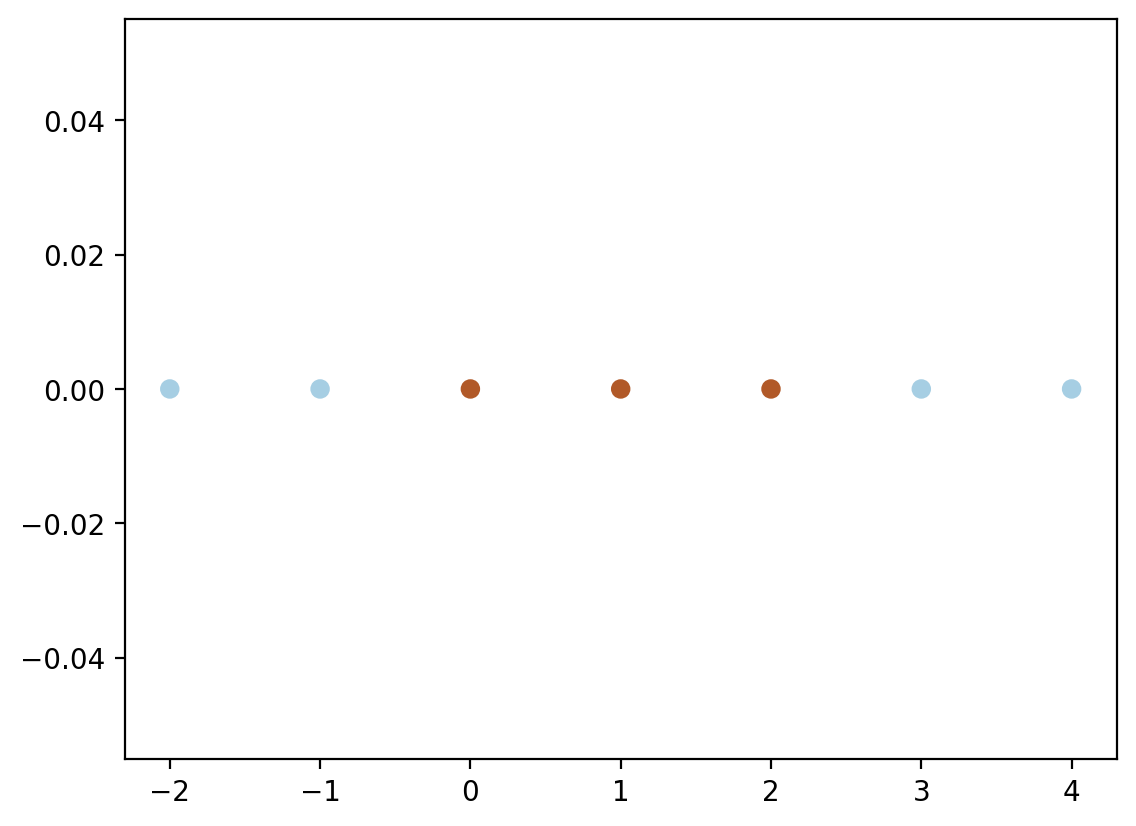

In [3]:
plt.scatter(X.flatten(), np.zeros_like(X), c=y, cmap=cm.Paired)

In [4]:
def phi(x):
    return np.hstack([x, x**2])

In [5]:
phi(X)

array([[-2,  4],
       [-1,  1],
       [ 0,  0],
       [ 1,  1],
       [ 2,  4],
       [ 3,  9],
       [ 4, 16]])

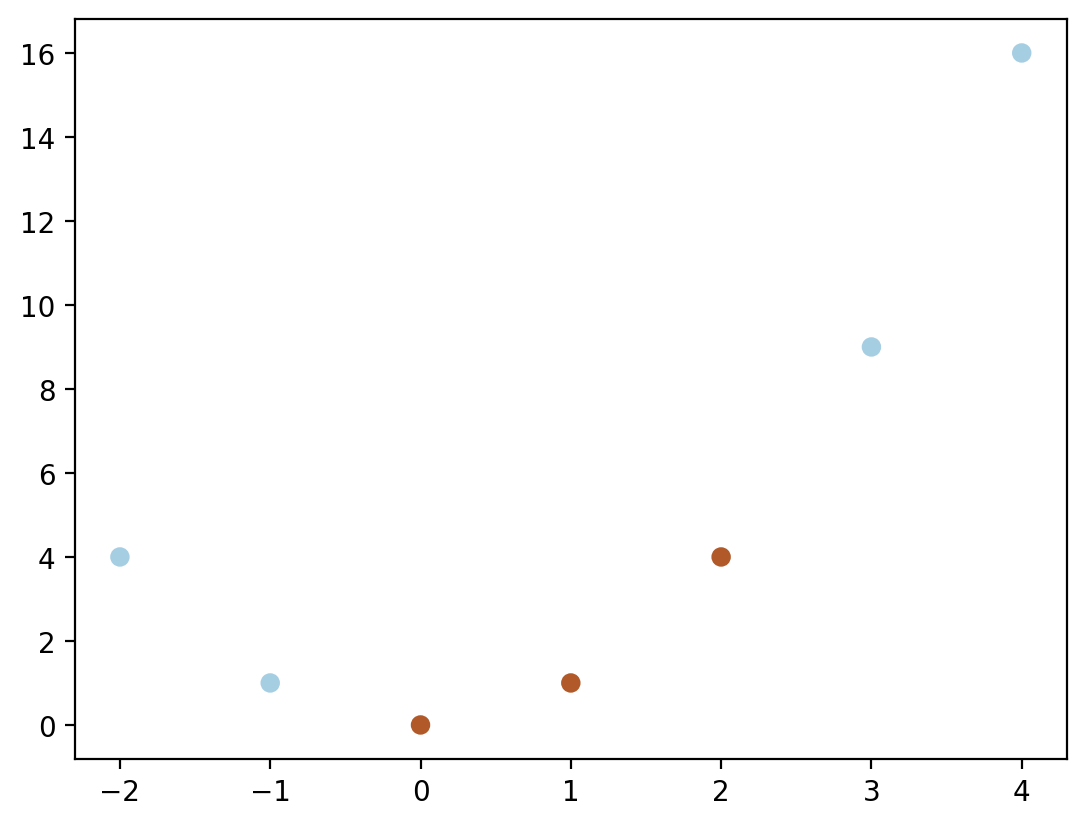

In [6]:
plt.scatter(phi(X)[:, 0], phi(X)[:, 1], c = y,cmap = cm.Paired)

In [7]:
from sklearn.svm import SVC

In [8]:
c = SVC(kernel='linear', C = 1e6)

In [9]:
c.fit(phi(X), y)

SVC(C=1000000.0, kernel='linear')

Text(0.5, 1.0, 'Decision surface: 1.3*x_1 + -0.7*x_2 + 1.0 = 0')

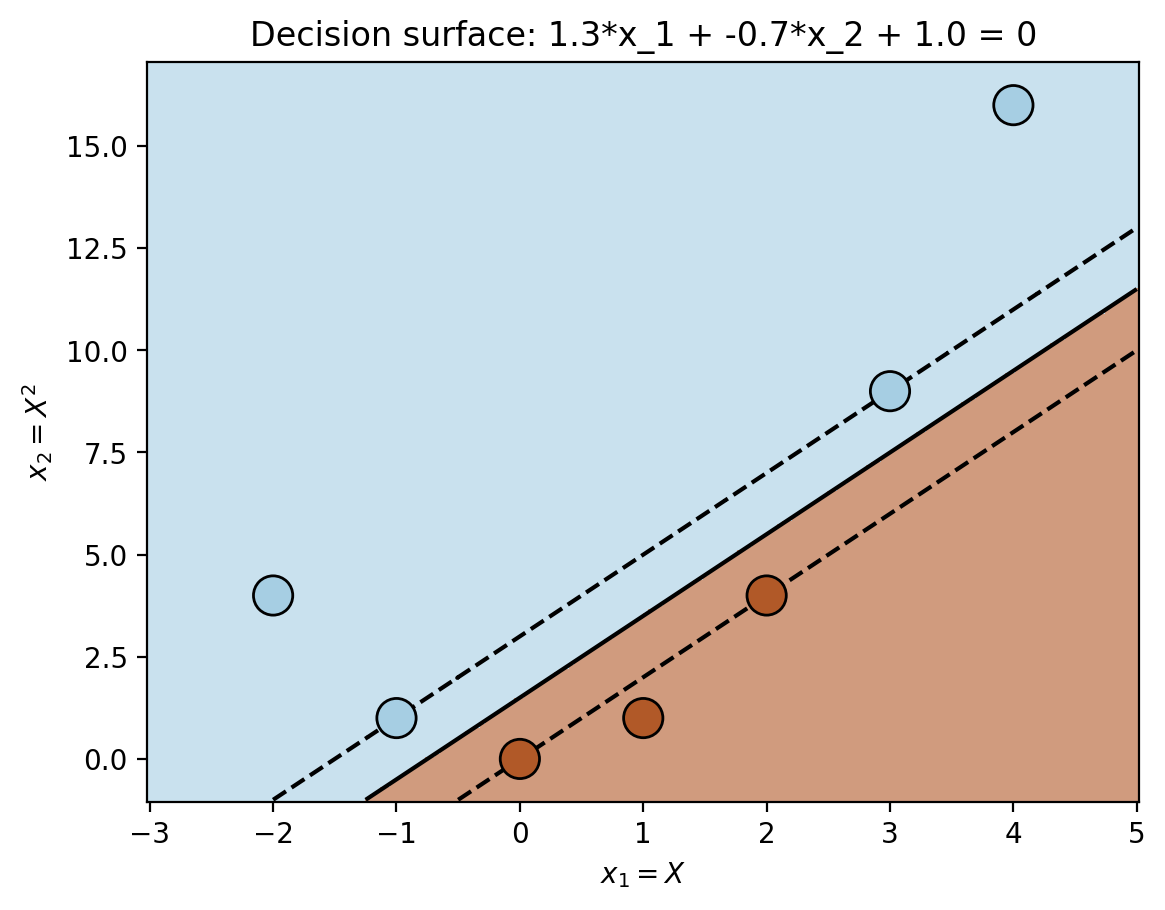

In [10]:
plt.scatter(phi(X)[:, 0], phi(X)[:, 1], c = y, zorder=10, cmap =cm.Paired, edgecolors='k', alpha=1, s=200)
x_min = phi(X)[:, 0].min()-1
x_max = phi(X)[:, 0].max()+1
y_min = phi(X)[:, 1].min()-1
y_max = phi(X)[:, 1].max()+1

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = c.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.6)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-1, 0, 1])
plt.xlabel(r"$x_1 = X$")
plt.ylabel(r"$x_2 = X^2$")
plt.title(r"Decision surface: {:0.1f}*x_1 + {:0.1f}*x_2 + {:0.1f} = 0".format(c.coef_[0, 0], c.coef_[0, 1], c.intercept_[0]))

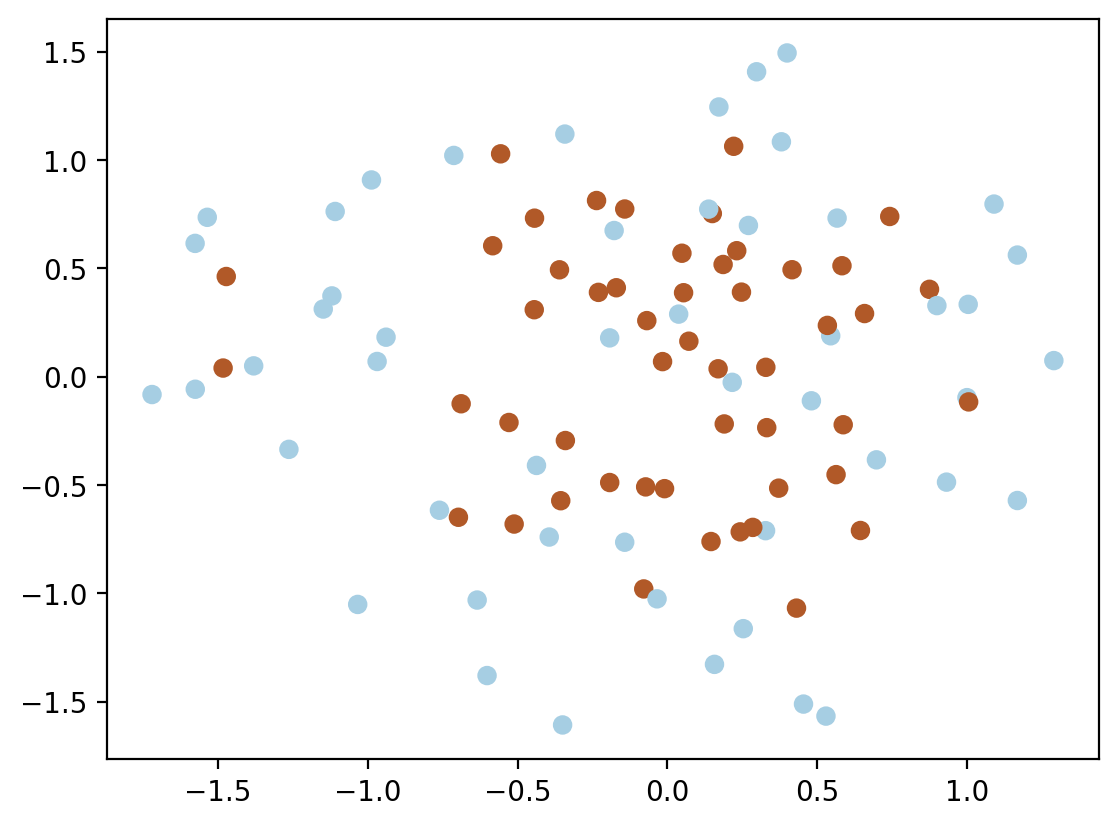

In [11]:
# Now using non-linearly separable data in 2D

from sklearn.datasets import make_blobs, make_circles

X, y = make_circles(n_samples=100, factor=0.5, noise=0.4)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.Paired)


In [57]:
def plot_contour(X, y, clf):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 40), np.linspace(X[:, 1].min(), X[:, 1].max(), 40))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.9,
            linestyles=['--', '-', '--'])

    plt.scatter(c.support_vectors_[:, 0], c.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.Paired)
    
    plt.pcolormesh(xx, yy, Z > 0, cmap=plt.cm.Paired, alpha=0.2)

    
    
    # Train accuracy
    y_pred = clf.predict(X)
    plt.title("Train accuracy: {:0.2f}\n Number of support vectors: {}".format((y_pred == y).mean(), len(clf.support_vectors_)))

    
    

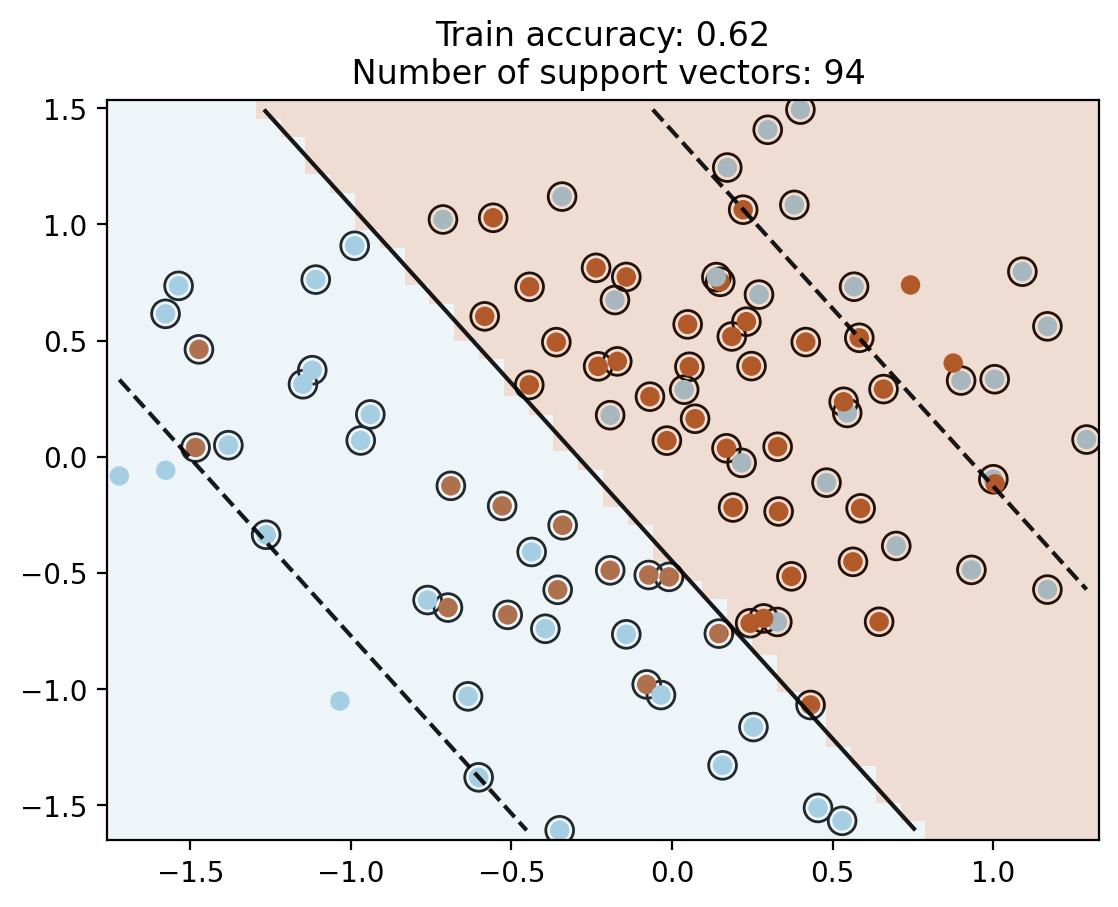

In [58]:
# First linear SVM

c = SVC(kernel='linear', C=10)
c.fit(X, y)

plot_contour(X, y, c)

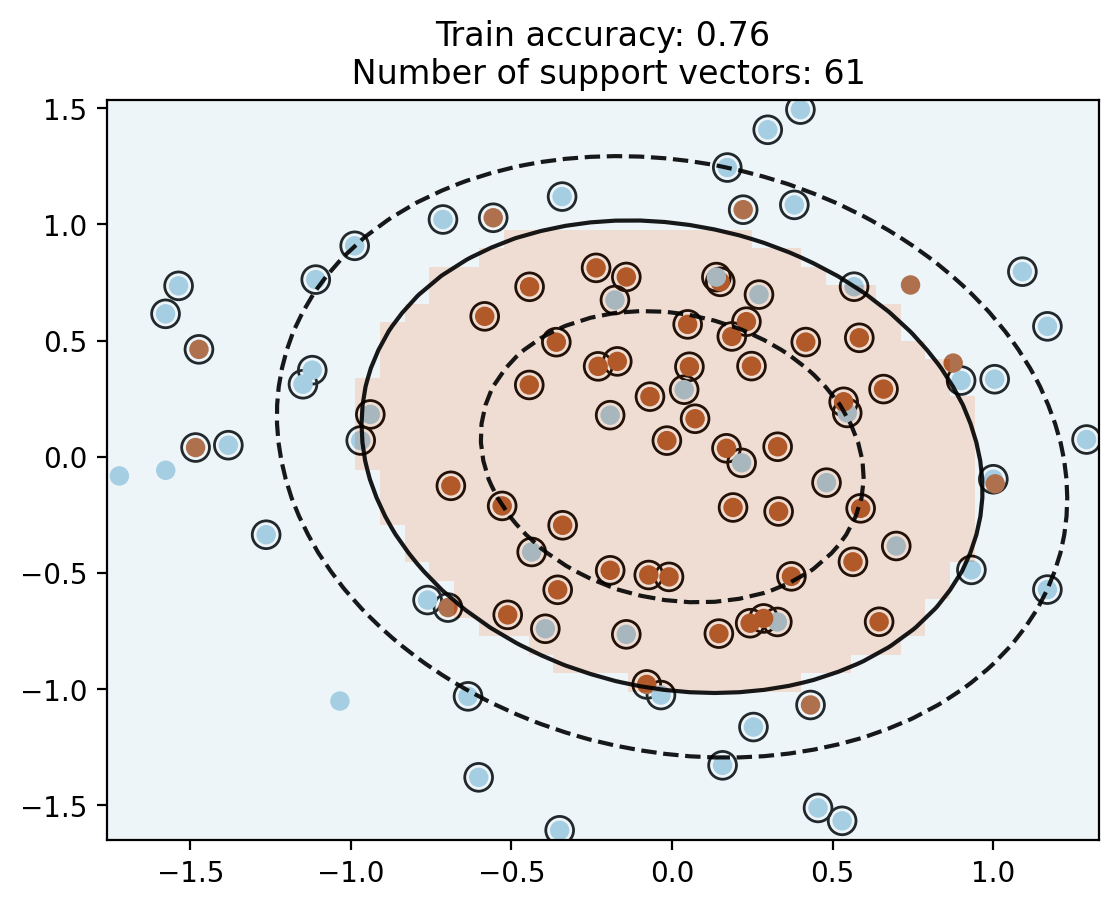

In [59]:
c_poly2 = SVC(kernel='poly', degree=2, C=10)

c_poly2.fit(X, y)

plot_contour(X, y, c_poly2)


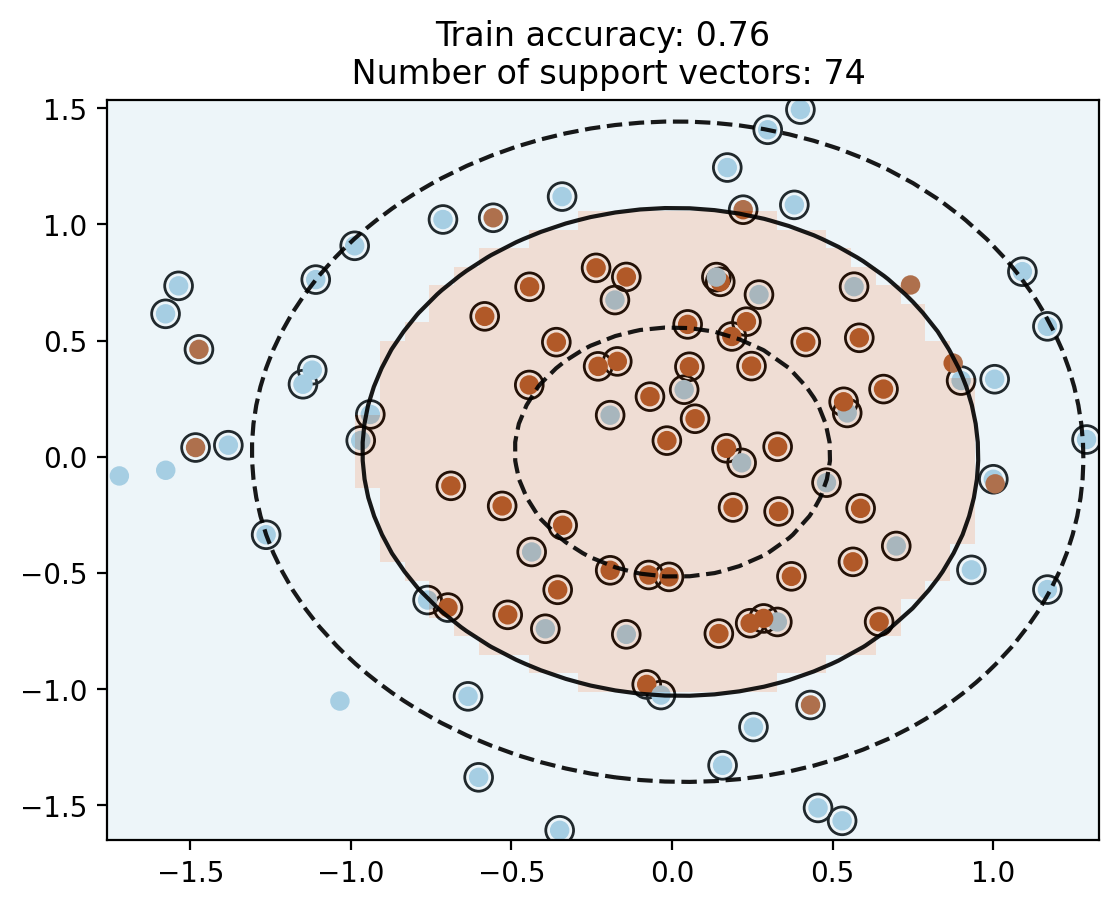

In [60]:
# RBF kernel

c_rbf = SVC(kernel='rbf', C=10, gamma=1e-1)
c_rbf.fit(X, y)

plot_contour(X, y, c_rbf)

In [66]:
# interactive widget to show the effect of gamma

from ipywidgets import interact

def plot_svm(gamma=0.05):
    c = SVC(kernel='rbf', C=10, gamma=gamma)
    c.fit(X, y)
    plot_contour(X, y, c)

interact(plot_svm, gamma=(0.01, 60, 0.05))


interactive(children=(FloatSlider(value=0.05, description='gamma', max=60.0, min=0.01, step=0.05), Output()), …

<function __main__.plot_svm(gamma=0.05)>